# **Random Forest**

## 1. Exploratory Data Analysis (EDA):

In [6]:
import pandas as pd

df = pd.read_excel(r"C:\Users\SHREYAS\Desktop\glass.xlsx", sheet_name="glass")

In [7]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [8]:
df.shape

(214, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [10]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [12]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

## 2: Data Visualization:

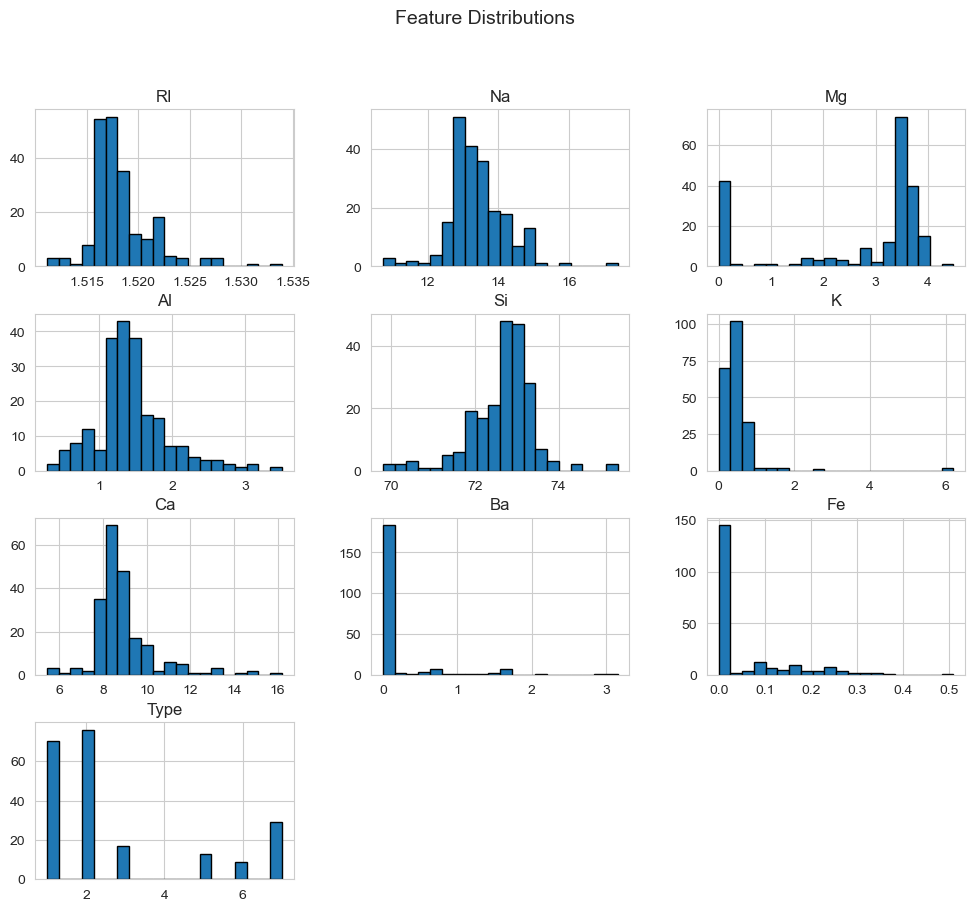

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# histograms 
df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

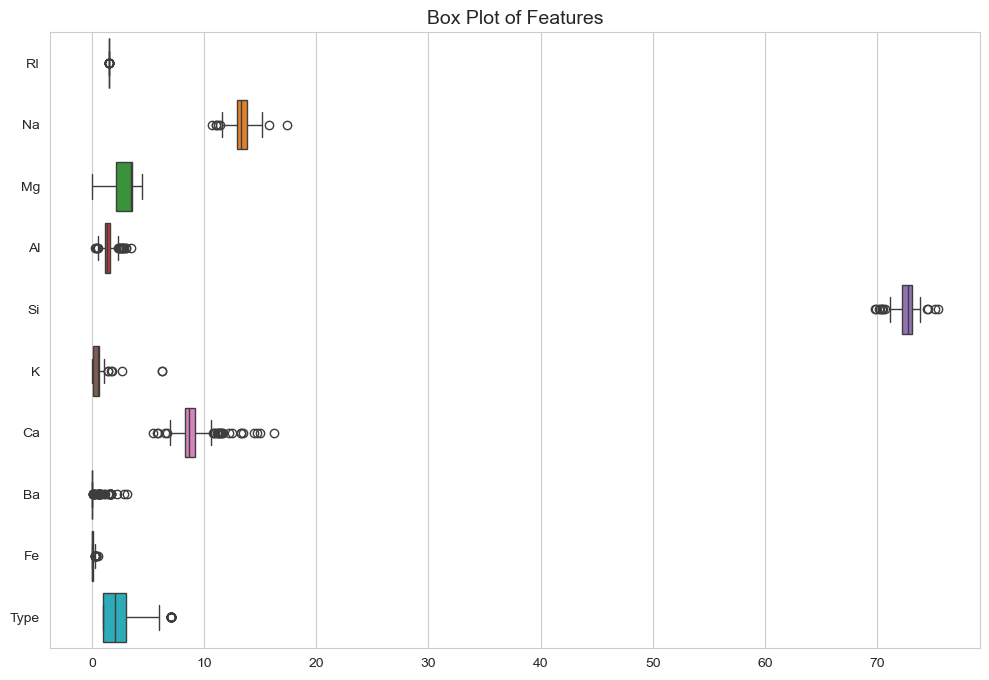

In [18]:
# Box plot:

plt.figure(figsize=(12, 8))
sns.boxplot(data=df, orient="h")
plt.title("Box Plot of Features", fontsize=14)
plt.show()

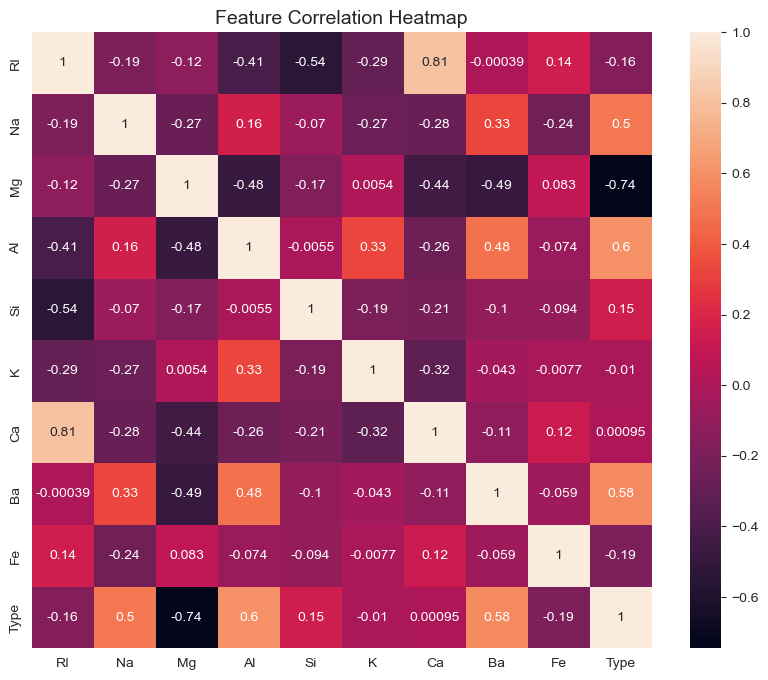

In [20]:
 # Correlation heatmap 

z = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(z, annot=True)
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()

## 3: Data Preprocessing:

In [21]:
X = df.drop(columns=["Type"])

In [22]:
print(X)

          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0
..       ...    ...   ...   ...    ...   ...   ...   ...  ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0

[214 rows x 9 columns]


In [23]:
y = df["Type"]

In [24]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64


In [26]:
# Apply Standardization 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((171, 9), (43, 9), (171,), (43,))

## 4: Random Forest Model Implementation:

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [30]:
y_pred = rf_model.predict(X_test_scaled)

In [31]:
print(y_pred)

[7 5 2 5 1 2 2 2 1 1 3 1 7 6 1 7 7 1 1 2 1 1 7 2 1 3 2 6 2 1 7 1 1 2 2 2 1
 1 2 1 1 2 6]


In [34]:
# Accuracy Score

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8372093023255814


In [35]:
# Confusion Matricx

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[13  1  0  0  0  0]
 [ 3 11  0  0  1  0]
 [ 1  0  2  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]


In [36]:
# Classification Report

class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           1       0.76      0.93      0.84        14
           2       0.85      0.73      0.79        15
           3       1.00      0.67      0.80         3
           5       1.00      0.67      0.80         3
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         6

    accuracy                           0.84        43
   macro avg       0.88      0.83      0.84        43
weighted avg       0.85      0.84      0.84        43



## 5: Bagging and Boosting Methods:

In [42]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

# Bagging 
bagging_model = BaggingClassifier(estimator=RandomForestClassifier(n_estimators=100, random_state=42), n_estimators=10, random_state=42)
bagging_model.fit(X_train_scaled, y_train)
y_pred_bagging = bagging_model.predict(X_test_scaled)
bagging_accuracy = accuracy_score(y_test, y_pred_bagging)

# AdaBoost Classifier
adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost_model.fit(X_train_scaled, y_train)
y_pred_adaboost = adaboost_model.predict(X_test_scaled)
adaboost_accuracy = accuracy_score(y_test, y_pred_adaboost)

# Gradient Boosting Classifier
gradient_boost_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gradient_boost_model.fit(X_train_scaled, y_train)
y_pred_gradient_boost = gradient_boost_model.predict(X_test_scaled)
gradient_boost_accuracy = accuracy_score(y_test, y_pred_gradient_boost)

print("bagging_accuracy", bagging_accuracy) 
print("adaboost_accuracy",adaboost_accuracy)
print("gradient_boost_accuracy", gradient_boost_accuracy)


D:\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


bagging_accuracy 0.7906976744186046
adaboost_accuracy 0.5348837209302325
gradient_boost_accuracy 0.8372093023255814


## Additional Notes:

### 1. Explain Bagging and Boosting methods. How is it different from each other.

| Feature      | **Bagging** 🏆 | **Boosting** 🚀 |
|-------------|--------------|---------------|
| **Concept** | Trains multiple models independently on random subsets of data | Trains models sequentially, where each model corrects previous errors |
| **Training** | **Parallel** (independent models) | **Sequential** (each model learns from mistakes of the previous one) |
| **Purpose** | Reduces **variance**, prevents overfitting | Reduces **bias**, improves weak learners |
| **Model Combination** | Majority voting (classification) / Averaging (regression) | Weighted sum (stronger influence from correct predictions) |
| **Best For** | High-variance models (e.g., Decision Trees) | High-bias models (e.g., Weak Decision Stumps) |
| **Example Algorithm** | **Random Forest** (Bagging of Decision Trees) | **AdaBoost, Gradient Boosting, XGBoost** |

### **Key Difference**  
- **Bagging → Reduces Variance** (More stable predictions).  
- **Boosting → Reduces Bias** (Learns from mistakes, but can overfit).  


## 2. Explain how to handle imbalance in the data.

1) **Resampling Techniques:**
- Oversampling (SMOTE, Random Oversampling) – Adds more minority class samples.
- Undersampling (Random Undersampling, Tomek Links) – Reduces majority class samples.

2) **Algorithm Adjustments:**
- Class Weighting (class_weight='balanced' in models).
- Ensemble Methods (Balanced Random Forest, Boosting).

3) **Better Evaluation Metrics:**
- Use Precision, Recall, F1-score, ROC-AUC instead of accuracy.
-  Best Practice: If data is small, use oversampling. If large, use undersampling.